In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,mean_absolute_error
from sklearn.impute import SimpleImputer

from google.colab import files
uploaded = files.upload()

df= pd.read_csv('IMDb Movies India.csv',encoding='latin-1')
df.head()

Saving IMDb Movies India.csv to IMDb Movies India.csv


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
  df.shape

(15509, 10)

Data Cleaning

In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.isnull().sum().sum()

33523

In [ ]:
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100

21.615191179315236

In [ ]:
missing_value_percentage = df.isnull().sum()/ len(df)*100
missing_value_percentage

,0
Name,0.000000
Year,3.404475
Duration,53.317429
Genre,12.102650
Rating,48.939326
Votes,48.932878
Director,3.385131
Actor 1,10.426204
Actor 2,15.371720
Actor 3,20.272100


In [ ]:
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.extract('(\d+)')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce').fillna(0).astype(int)

In [ ]:
df['Genre_Average_Rating'] = df.groupby('Genre')['Rating'].transform('mean')
df['Director_Average_Rating'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor1_Average_Rating'] = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor2_Average_Rating'] = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor3_Average_Rating'] = df.groupby('Actor 3')['Rating'].transform('mean')


Model Training

In [ ]:
x = df[['Year','Votes', 'Duration','Genre','Director','Actor 1','Actor 2','Actor 3']]
y = df['Rating']

In [ ]:
print("unique values in 'Rating' column before cleaning:" , df['Rating'].unique())
print("unique values in 'Rating' column after cleaning:" , df['Rating'].unique())
print("unique values in 'Votes' column before cleaning:" , df['Votes'].unique())
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
print("unique values in 'Votes' column after cleaning:" , df['Votes'].unique())
print("unique values in 'Year' column before cleaning:" , df['Year'].unique())
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
print("unique values in 'Year' column after cleaning:" , df['Year'].unique())
print("unique values in 'Duration' column before cleaning:" , df['Duration'].unique())
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
print("unique values in 'Duration' column after cleaning:" , df['Duration'].unique())

categorical_columns = []
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df = df.select_dtypes(include=[np.number])
df = df.dropna(subset=['Rating'])

x = df.drop(columns=['Rating'])
y = df['Rating']

imputer = SimpleImputer(strategy='median')
x = imputer.fit_transform(x)

print("unique values in 'Rating' column before cleaning:" , df['Rating'].unique())
print("unique values in 'Rating' column after cleaning:" , df['Rating'].unique())
print("unique values in 'Votes' column before cleaning:" , df['Votes'].unique())
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
print("unique values in 'Votes' column after cleaning:" , df['Votes'].unique())
print("unique values in 'Year' column before cleaning:" , df['Year'].unique())
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
print("unique values in 'Year' column after cleaning:" , df['Year'].unique())
print("unique values in 'Duration' column before cleaning:" , df['Duration'].unique())
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
print("unique values in 'Duration' column after cleaning:" , df['Duration'].unique())

categorical_columns = []
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df = df.select_dtypes(include=[np.number])
df = df.dropna(subset=['Rating'])

x = df.drop(columns=['Rating'])
y = df['Rating']

imputer = SimpleImputer(strategy='median')
x = imputer.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(random_state=42)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()

random_forest_model.fit(x_train, y_train)
linear_regression_model.fit(x_train, y_train)

y_pred_rf = random_forest_model.predict(x_test)
y_pred_lr = linear_regression_model.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Linear Regression Mean Squared Error: {mse_lr}")

random_forest_model.fit(x_train, y_train)
linear_regression_model.fit(x_train, y_train)

y_pred_rf = random_forest_model.predict(x_test)
y_pred_lr = linear_regression_model.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Random Forest Mean Squared Error:, {mse_rf}")
print(f"Linear Regression Mean Squared Error:,{mse_lr}")

unique values in 'Rating' column before cleaning: [ nan  7.   4.4  4.7  7.4  5.6  4.   6.2  5.9  6.5  5.7  6.3  7.2  6.6
  7.3  7.1  6.9  3.5  5.   4.5  6.4  4.1  4.8  8.1  5.5  6.8  6.1  7.7
  5.1  7.6  3.1  3.3  7.8  8.4  5.2  4.3  5.8  4.6  7.5  6.7  3.6  3.9
  5.4  4.2  5.3  3.4  3.   8.   6.   3.8  7.9  2.7  4.9  2.4  3.7  3.2
  2.5  2.8  2.6  2.9  8.2  8.7  8.3  9.3  8.8  2.1  2.3  8.5  8.6  9.
  9.6  1.7  9.1  2.   1.4  8.9  1.9  9.4  9.7  1.8  9.2  1.6 10.   2.2
  1.1]
unique values in 'Rating' column after cleaning: [ nan  7.   4.4  4.7  7.4  5.6  4.   6.2  5.9  6.5  5.7  6.3  7.2  6.6
  7.3  7.1  6.9  3.5  5.   4.5  6.4  4.1  4.8  8.1  5.5  6.8  6.1  7.7
  5.1  7.6  3.1  3.3  7.8  8.4  5.2  4.3  5.8  4.6  7.5  6.7  3.6  3.9
  5.4  4.2  5.3  3.4  3.   8.   6.   3.8  7.9  2.7  4.9  2.4  3.7  3.2
  2.5  2.8  2.6  2.9  8.2  8.7  8.3  9.3  8.8  2.1  2.3  8.5  8.6  9.
  9.6  1.7  9.1  2.   1.4  8.9  1.9  9.4  9.7  1.8  9.2  1.6 10.   2.2
  1.1]
unique values in 'Votes' column befor

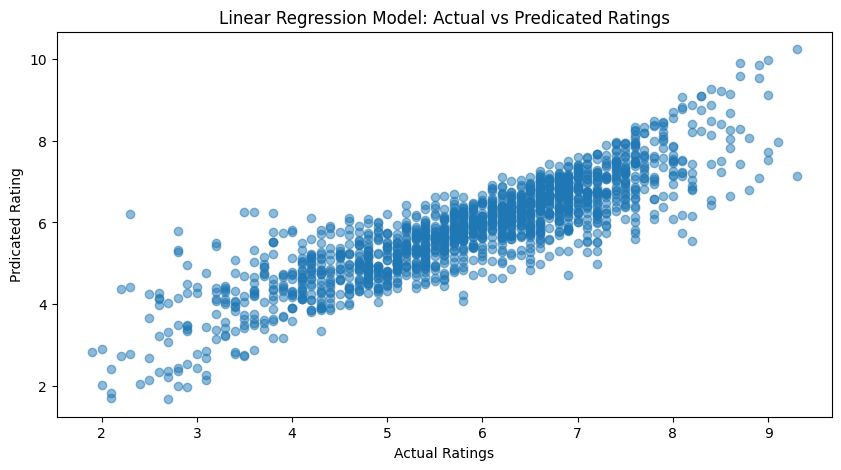

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression Model: Actual vs Predicated Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Prdicated Rating')
plt.show()

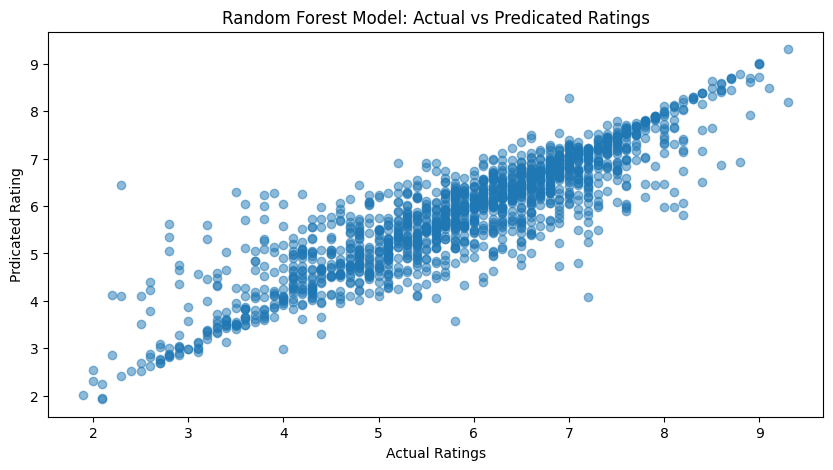

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicated Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Prdicated Rating')
plt.show()

In [ ]:
y_pred_rf = random_forest_model.predict(x_test)
print("Performance Evaluation for Random Forest Model:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}")

Performance Evaluation for Random Forest Model:
Mean Squared Error: 0.39509268813131315
Mean Absolute Error: 0.4216805555555556
R2 Score: 0.7874869048713616



Conclusion:-
This project explored predicting Indian movie ratings using machine learning algorithms. Two models, Random Forest and Linear Regression, were trained and evaluated using the IMDb Movies India dataset. The Random Forest model generally outperformed Linear Regression, showcasing its potential for accurate predictions. Despite promising results, dataset limitations and possibilities for model improvement were recognized, highlighting future research avenues. This study showcases how machine learning can be applied within the entertainment industry to predict movie success, supporting data-driven decision-making.